평가 지표와 측정

- 현재까지 분류 성능 평가에는 정확도, 회귀 성능 평가에는 R2을 이용했다.
- 실전에는 다양한 모델 성능 평가 방법이 있고, 모델 선택 및 매개변수 튜닝시 올바른 지표 선택이 중요하다. 

    1) 최종 목표 기억
    - 평가 지표 선택 시, 머신러닝 애플리케이션의 최종 목표를 기억해야 한다. 
    - 교통사고 회피, 소비자 유치 등의 다양한 비즈니스 임팩트가 있다. 
    - 특정 모델이 비즈니스에 영향을 끼치려면 실제 운영시스템에 적용해야 알 수 있어 어려운 문제다. 
    - 실제 운영시스템에 바로 적용하기는 힘들어 이러한 경우 평가지표를 이용한 대리 평가 방식을 종종 이용한다. 
    
    2) 이진분류의 평가 지표
    - 실전에서 가장 널리 이용하고 개념도 쉬운 알고리즘.
    - 이진분류에는 양성, 음성 클래스로 나뉘고 주로 양성 클래스가 분석가의 관심사이다. 
    
        - 에러의 종류
        - 잘못 분류한 샘플의 수가 원하는 정보의 전부는 아니므로, 정확도만으로는 예측 성능 측정하기 부족한 경우가 있다. 
        - 통계학에서는 FP(False Positive)를 타입 1 에러, FN(False Negative)를 타입2에러라고 한다. 
        - 암을 예로 들면 FP보다 FN이 더 중요하다. 
        
        
        - 불균형 데이터셋
        - 한 클래스가 다른 것보다 훨씬 많은 데이터 셋을 불균형 데이터셋이라고 한다. 
        - 현실에서는 불균형 데이터셋이 많으며 이를 고려하지 않으면 실제 데이터 적용시 진짜 좋은 모델과, 단순히 불균형 데이터셋에 치우친 모델 구분이 어렵다.

In [1]:
#예를 이용해 9:1 불균형 데이터셋 생성

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target ==9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [6]:
#항상 다수인 클래스를 예측값으로 내놓는 DummyClassifier를 이용해 정확도 계산
from sklearn.dummy import DummyClassifier
import numpy as np

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('예측 레이블의 레이블 :', np.unique(pred_most_frequent))
print('테스트 점수 :', dummy_majority.score(X_test, y_test))

#dummyclassifier는 클래스 레이블 비율에 맞게 예측하는  stratified, 가장 많은 레이블을 예측하는 most_frequent 등이 있다. 
#dummyregressor가 있고 평균값 예측, 중간값 예측 등이 있다. 

예측 레이블의 레이블 : [False]
테스트 점수 : 0.8955555555555555


- 현재 거의 아무것도 학습하지 않고 약 90%의 정확도를 얻었다. 
- 불균형 데이터셋의 경우 무조건 한 클래스를 예측하기만해도 정확도가 높게 나타날 수 있다는 것을 확인했다.


In [5]:
#비교를 위한 DT
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('테스트 점수 :', tree.score(X_test, y_test))

테스트 점수 : 0.9177777777777778


- DT는 더미 분류기보다 조금 나을 뿐이다.
- DT를 잘못 사용했거나, 이 문제에서는 정확도가 높은 측정 방법이 아님을 말해준다. 

In [8]:
#비교를 위한 LogisticRegression, DummyClassifier

from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print('dummy 점수 :', dummy.score(X_test, y_test))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print('logreg 점수 :', logreg.score(X_test, y_test))

dummy 점수 : 0.8177777777777778
logreg 점수 : 0.9777777777777777


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- 무작위로 예측하는 더미 분류기는 결과가 좋지않다. 
- 불균형 데이터셋에서 예측 성능을 정량화하는데 정확도는 적절한 측정 방법이 아니다. 

오차 행렬

- 이진 분류 평가 결과를 나타낼 때 가장 널리 이용하는 방법 중 하나

In [10]:
#앞의 LogisticRegression 예측결과를 confusion_matrix를 이용해 확인

from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print('오차 행렬 : \n', confusion)

오차 행렬 : 
 [[401   2]
 [  8  39]]


행은 정답 클래스, 열은 예측 클래스

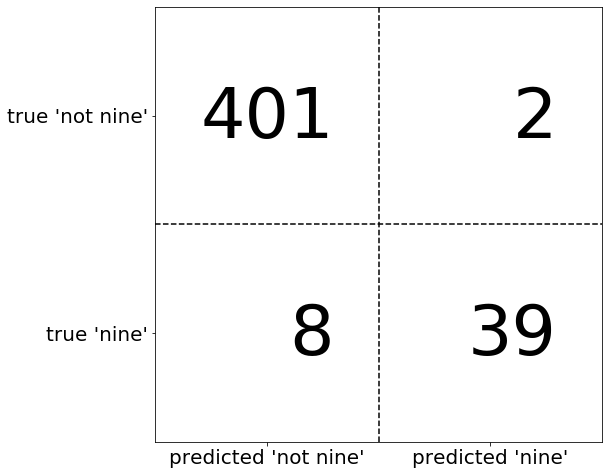

In [12]:
import mglearn

mglearn.plots.plot_confusion_matrix_illustration()

오차 행렬의 대각 행렬은 정확히 분류된 경우고 다른 항목은 다른 클래스로 분류된 것

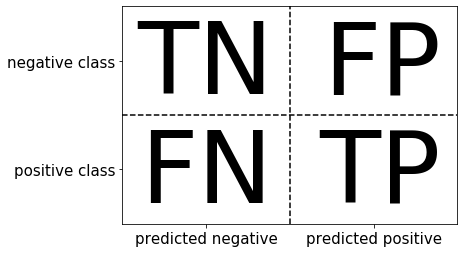

In [13]:
mglearn.plots.plot_binary_confusion_matrix()

In [14]:
#오차 행렬로 앞서 만든 모델 비교

print('빈도 기반 더미 :')
print(confusion_matrix(y_test, pred_most_frequent))
print('\n무작위 더미 모델 :')
print(confusion_matrix(y_test, pred_dummy))
print('\n결정 트리 :')
print(confusion_matrix(y_test, pred_tree))
print('\n로지스틱 회귀 :')
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 :
[[403   0]
 [ 47   0]]

무작위 더미 모델 :
[[357  46]
 [ 44   3]]

결정 트리 :
[[390  13]
 [ 24  23]]

로지스틱 회귀 :
[[401   2]
 [  8  39]]


- 오차 행렬 확인시 pred_most_frequent는 잘못 되었다. 동일한 클래스만을 예측하기 때문
- 이 오차행렬을 정확도로 표현하는 방법

                                 TP+TN
      정확도 =           ---------------------
                             TP +TN +FP +FN
                             
                             
                                  TP
      정밀도 =           ---------------------   (얼마나 많은 샘플이 진짜 양성인지 측정 , 거짓 양성의 수를 줄이는 것이 목표 일때 이용 = PPV )
                                TP +  FP
                             
                             
                                  TP
      재현율 =           ----------------------   ( 모든 양성 샘플을 식별해야 할 떄 이용, 거짓 음성 샘플을 피할 때 이용 = 민감도, 적중률, TPR )          
                               TP + FN
                               
- 재현율 최적화와 정밀도 최적화는 상충한다. 
- 정밀도와 재현율의 조화 평균인 f-점수(f-측정)은 이 둘을 하나로 요약해준다. 

                  정밀도 * 재현율
      F = 2 * --------------------------
                   정밀도 + 재현율
                   
- 정밀도와 재현율을 같이 고려하므로 불균형한 이진 분류 데이터셋에서는 정확도보다 더 나은 지표

In [15]:
#F-점수를 적용
from sklearn.metrics import f1_score
print('빈도기반 더미 f1', f1_score(y_test,pred_most_frequent))
print('무작위 더미 f1', f1_score(y_test, pred_dummy))
print('트리 모델 f1', f1_score(y_test, pred_tree))
print('로지스틱 회귀 모델 f1', f1_score(y_test, pred_logreg))

빈도기반 더미 f1 0.0
무작위 더미 f1 0.0625
트리 모델 f1 0.5542168674698795
로지스틱 회귀 모델 f1 0.8863636363636364


c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


- 이전에 정확도로 평가 한것과는 다른 결과가 나타남.
- 직관적으로 판단하는 데는 정확도보다 f1점수가 낫지만, 정확도보다 이해하거나 설명하기 어렵다. 

In [16]:
#classification_report로 정밀도, 재현율, f1점수 한번에 계산하여 깔끔하게 출력해준다.

from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



c:\users\cndak\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- 열은 정밀도, 재현율, f1스코어, 지지도(진짜 샘플 수) 순서로 표시되며 행은 True, False, 정확도, 평균, 가중평균을 나타낸다.

In [17]:
print(classification_report(y_test, pred_dummy, target_names=['9 아님','9']))

              precision    recall  f1-score   support

        9 아님       0.89      0.89      0.89       403
           9       0.06      0.06      0.06        47

    accuracy                           0.80       450
   macro avg       0.48      0.47      0.48       450
weighted avg       0.80      0.80      0.80       450

